In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# ■ モデル 1: 統計的差別による生産性損失シミュレーション
def simulate_hiring_bias(gamma_values):
    mu_f, sigma_f = 0.70, 0.15  # 女性の能力分布
    mu_m, sigma_m = 0.55, 0.15  # 男性の能力分布
    threshold_fair = 0.65       # 公正な合格ライン
    results = []

    for gamma in gamma_values:
        threshold_male = threshold_fair - gamma
        # --- 女性 ---
        alpha_f = (threshold_fair - mu_f) / sigma_f
        expected_val_f = mu_f + sigma_f * (stats.norm.pdf(alpha_f) / (1 - stats.norm.cdf(alpha_f)))
        # --- 男性 ---
        alpha_m = (threshold_male - mu_m) / sigma_m
        expected_val_m = mu_m + sigma_m * (stats.norm.pdf(alpha_m) / (1 - stats.norm.cdf(alpha_m)))
        acceptance_rate_m = 1 - stats.norm.cdf(alpha_m)
        
        results.append({
            "Bias (gamma)": gamma,
            "Male Threshold": f"{threshold_male:.2f}",
            "Male Acceptance Rate": f"{acceptance_rate_m:.1%}",
            "Male Avg Ability": f"{expected_val_m:.3f}",
            "Female Avg Ability": f"{expected_val_f:.3f}", 
            "Productivity Gap": f"{expected_val_f - expected_val_m:.3f}"
        })
    return pd.DataFrame(results)

gamma_range = [0.00, 0.05, 0.10, 0.15, 0.20]
df_simulation = simulate_hiring_bias(gamma_range)
print("=== Simulation Result: Impact of Bias on Productivity ===")
display(df_simulation)

=== Simulation Result: Impact of Bias on Productivity ===


,Bias (gamma),Male Threshold,Male Acceptance Rate,Male Avg Ability,Female Avg Ability,Productivity Gap
0,0.00,0.65,25.2%,0.740,0.790,0.050
1,0.05,0.60,36.9%,0.703,0.790,0.087
2,0.10,0.55,50.0%,0.670,0.790,0.120
3,0.15,0.50,63.1%,0.640,0.790,0.150
4,0.20,0.45,74.8%,0.614,0.790,0.176


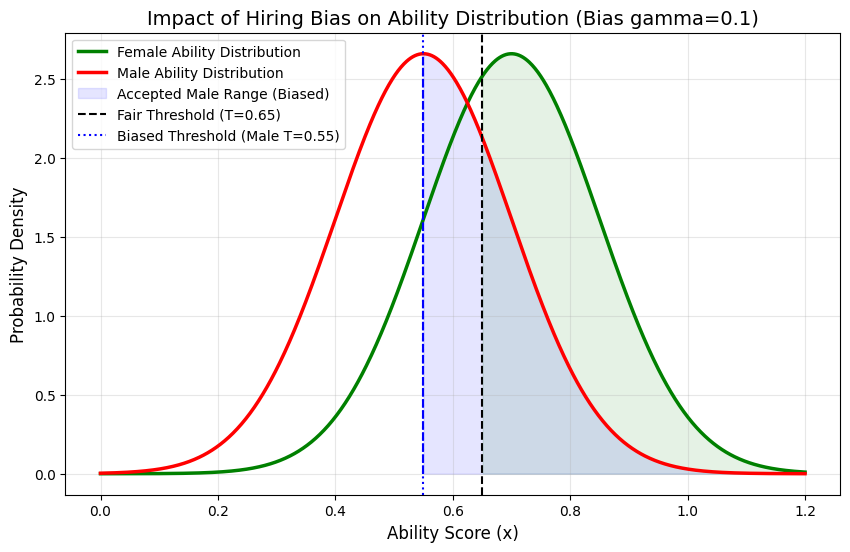

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# ■ モデル 1: 統計的差別による生産性損失シミュレーション
# 目的: バイアス（γ）の強さが、組織全体の「人的資本（Human Capital）」に与える負の影響を定量化する
# 理論背景: Arrow (1973) の統計的差別モデルおよびシグナリング理論に基づく

def simulate_hiring_bias(gamma_values):
    # ---------------------------------------------------------
    # 1. 候補者母集団の設定 (Population Parameters)
    # ---------------------------------------------------------
    # 女性(F)と男性(M)の能力分布（正規分布に従うと仮定）
    # ※ 実務的背景: エントリーシートやGPA等の基礎能力において、女性の平均値がわずかに高いケースを設定
    mu_f, sigma_f = 0.70, 0.15  
    mu_m, sigma_m = 0.55, 0.15  
    
    # 公正な採用基準 (Fair Threshold)
    threshold_fair = 0.65       
    
    results = []

    for gamma in gamma_values:
        # -----------------------------------------------------
        # 2. バイアスの適用 (Bias Application)
        # -----------------------------------------------------
        # 男性候補者に対してのみ、合格基準を緩和（下駄を履かせる）
        # gamma: 組織的な優遇措置やアンコンシャス・バイアスの強度
        threshold_male = threshold_fair - gamma
        
        # --- 女性（基準変更なし） ---
        # 厳格な基準で選抜されるため、合格者の平均能力は維持される
        alpha_f = (threshold_fair - mu_f) / sigma_f
        expected_val_f = mu_f + sigma_f * (stats.norm.pdf(alpha_f) / (1 - stats.norm.cdf(alpha_f)))
        acceptance_rate_f = 1 - stats.norm.cdf(alpha_f)

        # --- 男性（基準引き下げ） ---
        # 基準緩和により合格率は上がるが、限界的な能力の候補者が混入するため平均能力は低下する
        alpha_m = (threshold_male - mu_m) / sigma_m
        expected_val_m = mu_m + sigma_m * (stats.norm.pdf(alpha_m) / (1 - stats.norm.cdf(alpha_m)))
        acceptance_rate_m = 1 - stats.norm.cdf(alpha_m)
        
        results.append({
            "Bias (gamma)": gamma,
            "Male Threshold": f"{threshold_male:.2f}",
            "Male Acceptance Rate": f"{acceptance_rate_m:.1%}",
            "Male Avg Ability": f"{expected_val_m:.3f}",
            "Female Avg Ability": f"{expected_val_f:.3f}", 
            "Productivity Gap": f"{expected_val_f - expected_val_m:.3f}"
        })

    return pd.DataFrame(results)

# 実行
gamma_range = [0.00, 0.05, 0.10, 0.15, 0.20]
df_simulation = simulate_hiring_bias(gamma_range)
print("=== Simulation Result: Impact of Bias on Productivity ===")
display(df_simulation)